# Polynomial Linear Regression from Scratch on Breast Cancer Data
Linear regression is a algorithm which is starting level algorithm for machine learning prediction. This code contains only about how we can fit a linear model over user given dataset and also to get a good output result out of it. The code is fully moduler so that to keep in mind about the use of the functions in other programs also.
### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).

In [2]:
# read the data
data = pd.read_csv('Breast_Cancer_Data.csv')

Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [3]:
data.drop([data.columns[0],data.columns[32]],axis=1,inplace=True)
data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preparing of data
The data is divided in x and y terms by taking label as y and any of the feature as x.here i use perimeter mean in the training of linear model

In [4]:
x = data.iloc[:,1:2]
y = data.iloc[:,0:1]

Polynomial Regression is done by introducing higher degree terms in our regression problem to make it easier to fit a line through the data
Here x only has one feature, therefore we will introduce higher degree terms in it for example :- 
$x^2 , x^3 , etc$

### Objective Function
The objective function is the Mean Square Function for the Polynomial Regression. Mean square error function shows the mean square error done by the gradient descent to lower down the error/loss in the learning and predicting of data.

In [5]:
def objective_function(x,y,theta,theta_0,lam=0):
    MSE = np.sum(np.square(x@theta + theta_0 - y) + lam*0.5*np.square(np.linalg.norm(theta)))
    return (MSE/x.shape[0]*2)

### Theta Function
The fdash_theta and fdash_theta0 function are the function to calculate the theta and theta0 for the gradient descent for the training of the linear model.

In [6]:
def fdash_theta(x,y,theta,theta_0,lam=0):
    ans = (x@theta+theta_0-y ).T@x + lam*np.linalg.norm(theta)
    return 2*ans.T/x.shape[0]

def fdash_theta0(x,y,theta,theta_0):
    ans = np.sum(x@theta+theta_0-y)
    return 2*ans/x.shape[0]

### Data Creation Function
The data creation function is use to create an augmented data of the original data. The augmented data is containing the value of the user provide data having degree 2, 3, or more. <br>
for eg :- $x^2, x^3, etc$

In [7]:
def data_creation(x,y,degree):
    dummy1 = x
    dummy_temp = x
    
    for d in range(degree-1):
        dummy_temp = x*dummy_temp
        dummy1 = np.append(dummy1,dummy_temp,axis=1)
        
    # new data with the higher degree terms
    augmented_data = dummy1
    
    # normalise data
    xmean = np.mean(augmented_data,axis=0)
    xstd = np.std(augmented_data,axis=0)
    augmented_data = (augmented_data-xmean)/xstd
    
    ymean = np.mean(y)
    ystd = np.std(y)
    y = (y-ymean)/ystd
    
    del dummy1,dummy_temp
    
    return augmented_data,y

### Plotter Function
The plotter function is use to plot the graph of polynomial regression. The graph is plot over different degree of the data.

In [8]:
def plotter(x,y,degree,theta):
    dummy1 = x
    dummy_temp = x

    for d in range(degree-1):
        dummy_temp = x*dummy_temp
        dummy1 = np.append(dummy1,dummy_temp,axis=1)

    # new data with the higher degree terms
    augmented_data = dummy1

    ymean = np.mean(y)
    ystd = np.std(y)
    xmean = np.mean(augmented_data,axis=0)
    xstd = np.std(augmented_data,axis=0)
    plt.plot(x,(((augmented_data-xmean)/xstd@theta)*ystd+ymean),label='degree '+str(degree))

### Polynomial Regression Function
The Fit function is to fit the learning curve and reduce the loss of the model. The algorithm use here is
the Stocastic Gradient Descent(SGD). The algorithm is containing the learning rate,epsilon for the stoping of
under going algorithm to find global minima.

In [9]:
def polynomial_regression(x,y,degree,alpha=0.001,eps=10e-10,lam=0):
    """
    This function will fit the given data x to y
    
    x: array containing the data
    y: array containing regression values
    degree: int value stating the highest degree polynomial to be introduced
    alpha=0.001: Learning Rate
    eps=10e-4: tolerance 
    lam=0: value of L2 regularisation parameter
    """     
    
    augmented_data,y = data_creation(x,y,degree)
    # Gradient Descent
    
    theta_i = np.zeros(shape=(augmented_data.shape[1],1))
    theta_0i = np.zeros(1)
    
    i = 0
    
    #Loop for the continuing the process again till it gets to the local minima
    while True:
        
        mse_i = objective_function(augmented_data,y,theta_i,theta_0i,lam)
        
        history_thet = 1
        history_thet0 = 1
        
        theta_f = theta_i - alpha*fdash_theta(augmented_data,y,theta_i,theta_0i,lam)
        theta_0f = theta_0i - alpha*fdash_theta0(augmented_data,y,theta_i,theta_0i)
        
        mse_f = objective_function(augmented_data,y,theta_f,theta_0f,lam)
        
        if i%50000==0:
            print("MSE at step {} is {}".format(i,mse_f))
        i+=1
        
        if abs(mse_f-mse_i)<=eps:
            print("MSE at step {} is {}".format(i,mse_f))
            break
                
        theta_i = theta_f
        theta_0i = theta_0f
        
    return theta_f,theta_0f

## Main Function

In [10]:
# since they are series
x = np.array(x).reshape(569,1)
y = np.array(y).reshape(569,1)
theta,theta_0 = polynomial_regression(x,y,5,lam=0.05,alpha=10e-4,eps=10e-10)

MSE at step 0 is 1.9832122318809255
MSE at step 5576 is 0.9077622219819727


### Calculating Theta
Calculating the theta over various degree of the given data. The data is given by the user according the regression user wants. The degree is of the data which is :- <br>
$ x^2, x^3, etc$

MSE at step 0 is 1.9957409436903022
MSE at step 6127 is 0.9873917144125064
MSE at step 0 is 1.991754316239665
MSE at step 8968 is 0.9788381440525422
MSE at step 0 is 1.9882738004028666
MSE at step 7111 is 0.9734256769584445


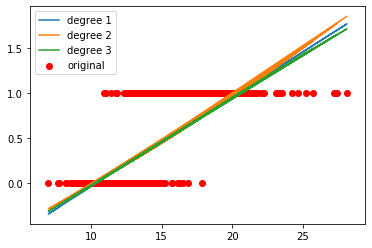

In [11]:
for d in range(1,4):
    theta,theta_0 = polynomial_regression(x,y,d,lam=0.1,alpha=10e-4,eps=10e-10)
    plotter(x,y,d,theta)
plt.scatter(x,y,label='original',color='red')
plt.legend()

### Simple Linear Regression
In case of Linear Regression. The linear model gives theta from the given formula.- <br>
$\theta = (X^{T}X)^{-1}X^{T}Y$ <br>
This formula is calculating the weight from simple linear regression model. Simple Linear regression is a algorithm which gives an overview of the theta over single feature of the dataset. 

In [12]:
#Simple Linear Regression
"""Simple Linear Regression function is a function use to calculate theta(weight) over a particular feature 
given by the user. Here a concept of polynomial regression of creating augmented data is used and the theta
is calculated over the augmented data."""
def find_theta(x,y,degree):
    dummy1 = x
    dummy_temp = x

    for d in range(degree-1):
        dummy_temp = x*dummy_temp
        dummy1 = np.append(dummy1,dummy_temp,axis=1)

    # new data with the higher degree terms
    augmented_data = dummy1

    ymean = np.mean(y)
    ystd = np.std(y)
    xmean = np.mean(augmented_data,axis=0)
    xstd = np.std(augmented_data,axis=0)

    adj_data = (augmented_data-xmean)/xstd
    adj_labels = (y-ymean)/ystd

    theta = np.linalg.inv(adj_data.T @ adj_data)@adj_data.T@adj_labels
    
    return theta

In [13]:
thet = find_theta(x,y,degree = 5)
print("The Theta Calculate Simple : ",thet)

The Theta Calculate Simple :  [[   7.03664512]
 [ -52.78471227]
 [ 123.26784157]
 [-115.02924456]
 [  38.20976639]]
